# EDA IBM stock 1min ticks



In [1]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [2]:
from modeling.createTrainingDataSet import createTrainingDataSet
from modeling.StockModel import generatePipeline

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [4]:
names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv('data/sampleKibotData/minuteIntraday/IBM_adjusted.txt', header=None, names=names, nrows=5000)
df['DateTime']= pd.to_datetime((df.Date+' '+df.Time),infer_datetime_format=True) 
df = df.drop(columns=['Date', 'Time'])
df = df.set_index('DateTime')


In [5]:
df.head()

,Open,High,Low,Close,Volume
DateTime,,,,,
1998-01-02 09:30:00,33.69,33.69,33.69,33.69,207820
1998-01-02 09:31:00,33.65,33.69,33.65,33.65,33499
1998-01-02 09:32:00,33.67,33.69,33.65,33.69,41254
1998-01-02 09:33:00,33.67,33.69,33.65,33.65,52110
1998-01-02 09:34:00,33.65,33.69,33.65,33.65,14892


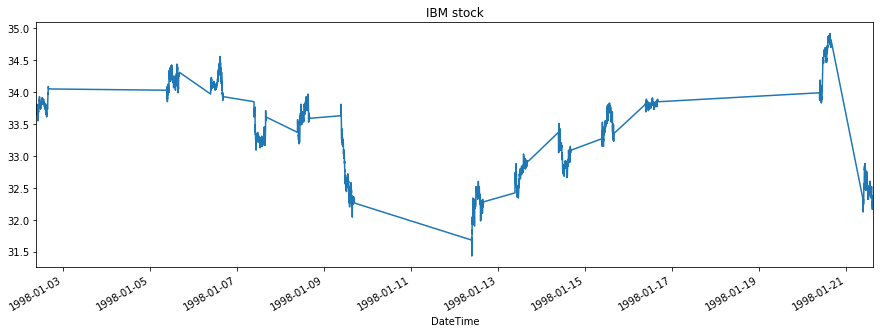

In [6]:
#df.head()
df.Open.plot(figsize=(15,5), title='IBM stock');
#df.index.map(lambda x: x.year).value_counts().sort_index().plot.bar(figsize=(15, 5), title='ticks per year');
#df.Open.diff().plot.hist(bins=200, figsize=(15,5), title= 'distribution of the differential');
#pd.Series(df.index.map(lambda x: x.day)).value_counts().sort_index().plot.bar()

In [7]:
dg  = createTrainingDataSet(df, presentStart=1, pastStart=5, futureEnd=-30)

In [8]:
dg.target.value_counts()

False    1553
True     1418
Name: target, dtype: int64

In [9]:
X = dg.copy()
y = X.pop('target')

In [10]:
X.shape

(2971, 6)

In [11]:
X.head()

,DateTime,Open,High,Low,Close,Volume
DateTime,,,,,,
1998-01-02 09:35:00,"[1998-01-02 09:30:00, 1998-01-02 09:31:00, 199...","[33.69, 33.65, 33.67, 33.67, 33.65, 33.67]","[33.69, 33.69, 33.69, 33.69, 33.69, 33.69]","[33.69, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.69, 33.65, 33.69, 33.65, 33.65, 33.65]","[207820.0, 33499.0, 41254.0, 52110.0, 14892.0,..."
1998-01-02 09:36:00,"[1998-01-02 09:31:00, 1998-01-02 09:32:00, 199...","[33.65, 33.67, 33.67, 33.65, 33.67, 33.67]","[33.69, 33.69, 33.69, 33.69, 33.69, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.69, 33.65, 33.65, 33.65, 33.67]","[33499.0, 41254.0, 52110.0, 14892.0, 72272.0, ..."
1998-01-02 09:37:00,"[1998-01-02 09:32:00, 1998-01-02 09:33:00, 199...","[33.67, 33.67, 33.65, 33.67, 33.67, 33.65]","[33.69, 33.69, 33.69, 33.69, 33.67, 33.65]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.69, 33.65, 33.65, 33.65, 33.67, 33.65]","[41254.0, 52110.0, 14892.0, 72272.0, 8065.0, 8..."
1998-01-02 09:38:00,"[1998-01-02 09:33:00, 1998-01-02 09:34:00, 199...","[33.67, 33.65, 33.67, 33.67, 33.65, 33.65]","[33.69, 33.69, 33.69, 33.67, 33.65, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.65, 33.65, 33.67, 33.65, 33.67]","[52110.0, 14892.0, 72272.0, 8065.0, 8685.0, 34..."
1998-01-02 09:39:00,"[1998-01-02 09:34:00, 1998-01-02 09:35:00, 199...","[33.65, 33.67, 33.67, 33.65, 33.65, 33.65]","[33.69, 33.69, 33.67, 33.65, 33.67, 33.67]","[33.65, 33.65, 33.65, 33.65, 33.65, 33.65]","[33.65, 33.65, 33.67, 33.65, 33.67, 33.67]","[14892.0, 72272.0, 8065.0, 8685.0, 34433.0, 77..."


# Debugging the pipeline

In [12]:
pipeline = generatePipeline()

## MIGHT BE USEFUL?. A precision recall-curve with only one training split.

In [21]:
# temporal split of train/test
trainPercentage = 50
testBegins = (len(X)*trainPercentage)//100
Xtrain, ytrain = X[:testBegins], y[:testBegins]
Xtest, ytest = X[testBegins:], y[testBegins:]

In [22]:
model = generatePipeline();
model.fit(Xtrain, ytrain);

/Users/lduque/Desktop/MyProjects/moneyManager/venv-money/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [24]:
# how to pick the threshold
ypredictedTrain=list(model.predict_proba(Xtrain)[:,1])
ypredictedTrain.sort(reverse=True)
threshold = ypredictedTrain[100]

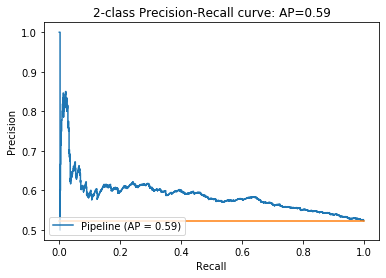

In [25]:
# ploting precision-recall !
base_rate = sum(ytest)/len(ytest)
ypredicted=model.predict_proba(Xtest)[:,1]
average_precision = average_precision_score(ytest, ypredicted)
disp = plot_precision_recall_curve(model, Xtest, ytest)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.plot([0, 1], [base_rate, base_rate]);

In [28]:
evaluationDF = pd.DataFrame({'predicted':ypredicted, 'target':ytest}, index=Xtest.index)
topPredictions = evaluationDF.sort_values(by='predicted', ascending=False)[:100]

In [29]:
topPredictions

,predicted,target
DateTime,,
1998-01-21 10:17:00,0.996733,True
1998-01-21 14:41:00,0.990479,True
1998-01-21 14:37:00,0.990036,False
1998-01-20 14:36:00,0.989606,False
1998-01-21 10:06:00,0.987711,True
...,...,...
1998-01-13 14:35:00,0.919772,False
1998-01-21 14:44:00,0.919084,True
1998-01-14 12:50:00,0.918042,True


In [30]:
evaluationDF['thresholdedPrediction']=evaluationDF.predicted>threshold

In [31]:
topPredictions=evaluationDF[evaluationDF.thresholdedPrediction==True]

In [32]:
topPredictions

,predicted,target,thresholdedPrediction
DateTime,,,
1998-01-13 11:01:00,0.923851,False,True
1998-01-13 11:51:00,0.913680,True,True
1998-01-13 11:54:00,0.964041,True,True
1998-01-13 13:05:00,0.961214,False,True
1998-01-13 13:06:00,0.965738,False,True
...,...,...,...
1998-01-21 14:42:00,0.939025,True,True
1998-01-21 14:44:00,0.919084,True,True
1998-01-21 14:45:00,0.971227,True,True
